In [36]:
import pandas as pd
df = pd.read_csv('voice.csv')


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.9+ KB


In [38]:
def transform(s):
    if s == "male":
        return 1
    if s == "female":
        return 0
df["label"] = df["label"].apply(transform)

In [39]:
df_train = df.sample(frac=1).iloc[:2300]
df_test = df.sample(frac=1).iloc[2300:]

In [40]:
from ludwig.api import LudwigModel

In [41]:
ludwig = LudwigModel(model_definition_file = "model_definition.yaml")

Обучим модель и посмотрим на зависимость потерь и точности от эпох

In [42]:
train = ludwig.train(df_train)

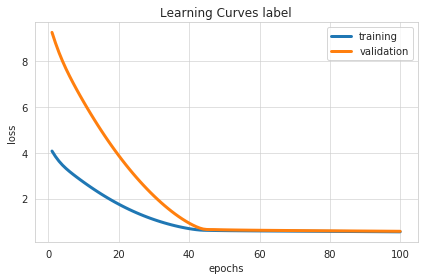

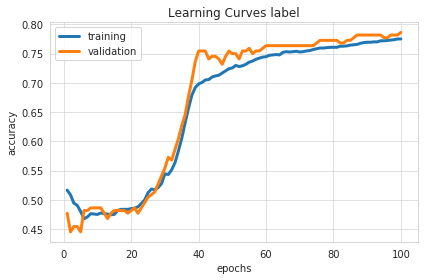

In [43]:
from ludwig import visualize
visualize.learning_curves(train, output_feature_name= "label")

Посмотрим точность предсказаний

In [44]:
pred = ludwig.predict(df_test)
pred

,label_predictions,label_probabilities
0,False,0.300555
1,True,0.519706
2,True,0.612530
3,True,0.846222
4,False,0.340825
...,...,...
863,True,0.618632
864,True,0.572732
865,True,0.618574
866,False,0.332634


In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(pred["label_predictions"], df_test["label"])

0.7880184331797235

In [48]:
ludwig.close()